In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

daily_metrics = pd.read_csv('/content/drive/MyDrive/csv_files/daily_trader_metrics.csv')

daily_metrics.head()

,account,date,classification,daily_pnl,trade_count,total_volume_usd,avg_trade_size_usd,win_rate,long_ratio,total_fees
0,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-10-27,Greed,-3.275059e+05,462,6842632.02,14810.891818,0.025974,0.300866,1112.895650
1,0x083384f897ee0f19899168e3b1bec365f52a9012,2025-02-19,Fear,1.927736e+06,3356,54854631.95,16345.241940,0.405542,0.468415,6292.416654
2,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,2024-10-27,Greed,2.060745e+04,320,797679.97,2492.749906,0.531250,0.453125,202.167151
3,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,2025-02-19,Fear,1.709873e+04,3533,5982611.50,1693.351684,0.435041,0.432494,1664.914670
4,0x271b280974205ca63b716753467d5a371de622ab,2024-07-03,Neutral,-1.000000e+00,5,30351.00,6070.200000,0.000000,0.400000,10.197932


In [ ]:
sentiment_perf = daily_metrics.groupby('classification').agg(
    avg_daily_pnl=('daily_pnl','mean'),
    median_daily_pnl=('daily_pnl','median'),
    avg_win_rate=('win_rate','mean'),
    avg_trade_count=('trade_count','mean'),
    avg_volume=('total_volume_usd','mean')
).reset_index()

sentiment_perf


,classification,avg_daily_pnl,median_daily_pnl,avg_win_rate,avg_trade_count,avg_volume
0,Extreme Greed,35393.098355,0.000000,0.336609,1392.40000,7.881354e+06
1,Fear,209372.662205,81389.682515,0.415878,4183.46875,2.200495e+07
2,Greed,99675.516731,35988.376437,0.374074,1134.03125,3.609490e+06
3,Neutral,19842.797260,-0.418640,0.260683,892.62500,2.730404e+06


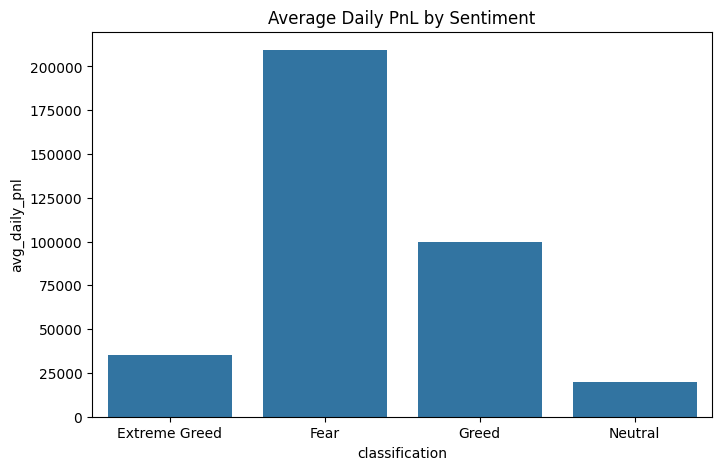

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(data=sentiment_perf, x='classification', y='avg_daily_pnl')
plt.title("Average Daily PnL by Sentiment")
plt.savefig('/content/drive/MyDrive/outputs/pnl_by_sentiment.png')
plt.show()


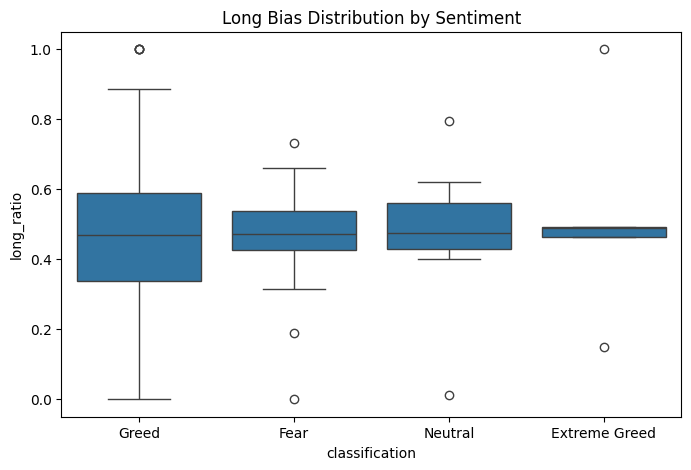

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(data=daily_metrics, x='classification', y='long_ratio')
plt.title("Long Bias Distribution by Sentiment")
plt.savefig('/content/drive/MyDrive/outputs/long_ratio_by_sentiment.png')
plt.show()

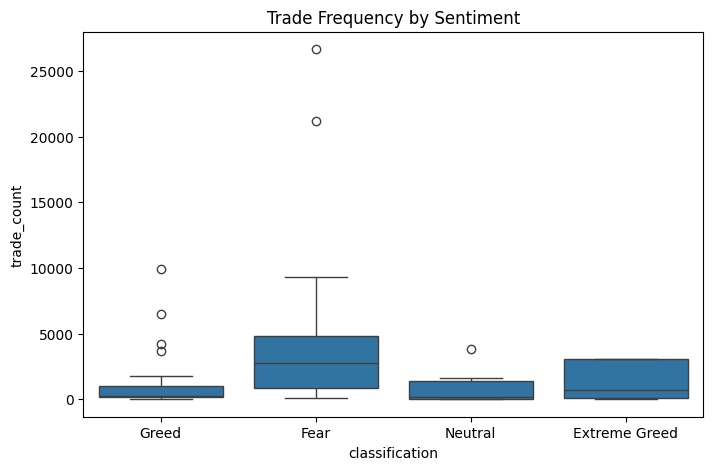

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(data=daily_metrics, x='classification', y='trade_count')
plt.title("Trade Frequency by Sentiment")
plt.savefig('/content/drive/MyDrive/outputs/trade_count_by_sentiment.png')
plt.show()

In [ ]:
trader_profile = daily_metrics.groupby('account').agg(
    overall_avg_pnl=('daily_pnl','mean'),
    pnl_volatility=('daily_pnl','std'),
    avg_win_rate=('win_rate','mean'),
    avg_trade_freq=('trade_count','mean')
).reset_index()

trader_profile.head()

,account,overall_avg_pnl,pnl_volatility,avg_win_rate,avg_trade_freq
0,0x083384f897ee0f19899168e3b1bec365f52a9012,800114.909989,1.594697e+06,0.215758,1909.0
1,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,18853.086574,2.481039e+03,0.483146,1926.5
2,0x271b280974205ca63b716753467d5a371de622ab,10587.696144,1.681032e+04,0.410153,382.0
3,0x28736f43f1e871e6aa8b1148d38d4994275d72c4,66157.740843,7.880372e+04,0.438246,6633.0
4,0x2c229d22b100a7beb69122eed721cee9b24011dd,84313.992027,4.539380e+04,0.504117,1617.0


In [ ]:
threshold = trader_profile['avg_trade_freq'].median()

trader_profile['activity_segment'] = trader_profile['avg_trade_freq'].apply(
    lambda x: 'High Activity' if x > threshold else 'Low Activity'
)

trader_profile.head()

,account,overall_avg_pnl,pnl_volatility,avg_win_rate,avg_trade_freq,activity_segment
0,0x083384f897ee0f19899168e3b1bec365f52a9012,800114.909989,1.594697e+06,0.215758,1909.0,High Activity
1,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,18853.086574,2.481039e+03,0.483146,1926.5,High Activity
2,0x271b280974205ca63b716753467d5a371de622ab,10587.696144,1.681032e+04,0.410153,382.0,Low Activity
3,0x28736f43f1e871e6aa8b1148d38d4994275d72c4,66157.740843,7.880372e+04,0.438246,6633.0,High Activity
4,0x2c229d22b100a7beb69122eed721cee9b24011dd,84313.992027,4.539380e+04,0.504117,1617.0,High Activity


In [ ]:
daily_metrics = daily_metrics.merge(
    trader_profile[['account','activity_segment']],
    on='account',
    how='left'
)

In [ ]:
segment_analysis = daily_metrics.groupby(
    ['classification','activity_segment']
).agg(
    avg_pnl=('daily_pnl','mean'),
    avg_win_rate=('win_rate','mean')
).reset_index()

segment_analysis

,classification,activity_segment,avg_pnl,avg_win_rate
0,Extreme Greed,High Activity,60843.169305,0.449904
1,Extreme Greed,Low Activity,-2782.008070,0.166667
2,Fear,High Activity,324428.018469,0.431415
3,Fear,Low Activity,94317.305942,0.400342
4,Greed,High Activity,158438.794314,0.403766
5,Greed,Low Activity,47825.565921,0.347876
6,Neutral,High Activity,6867.420164,0.258415
7,Neutral,Low Activity,32818.174355,0.262952


In [12]:
from scipy.stats import ttest_ind

fear_pnl = daily_metrics[daily_metrics['classification']=='Fear']['daily_pnl']
greed_pnl = daily_metrics[daily_metrics['classification']=='Greed']['daily_pnl']

t_stat, p_value = ttest_ind(fear_pnl, greed_pnl, equal_var=False)

print("T-Statistic:", t_stat)
print("P-Value:", p_value)

T-Statistic: 1.309267264616028
P-Value: 0.19567563543239794


In [13]:
risk_adjusted = daily_metrics.groupby('classification').agg(
    mean_pnl=('daily_pnl','mean'),
    std_pnl=('daily_pnl','std')
).reset_index()

risk_adjusted['risk_adjusted_return'] = (
    risk_adjusted['mean_pnl'] / risk_adjusted['std_pnl']
)

risk_adjusted

,classification,mean_pnl,std_pnl,risk_adjusted_return
0,Extreme Greed,35393.098355,85325.499902,0.414801
1,Fear,209372.662205,380423.906864,0.550367
2,Greed,99675.516731,282694.285526,0.352591
3,Neutral,19842.797260,57227.787895,0.346734


ML Model

In [14]:
# Create binary target
daily_metrics['profitable_day'] = (daily_metrics['daily_pnl'] > 0).astype(int)

# Encode sentiment
daily_metrics['sentiment_encoded'] = daily_metrics['classification'].astype('category').cat.codes

# Select features
features = [
    'trade_count',
    'total_volume_usd',
    'avg_trade_size_usd',
    'win_rate',
    'long_ratio',
    'total_fees',
    'sentiment_encoded'
]

X = daily_metrics[features]
y = daily_metrics['profitable_day']

print("Feature matrix shape:", X.shape)


Feature matrix shape: (77, 7)


In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print("Train size:", X_train.shape)
print("Test size:", X_test.shape)


Train size: (53, 7)
Test size: (24, 7)


In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

model = RandomForestClassifier(
    n_estimators=200,
    max_depth=5,
    random_state=42
)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

Accuracy: 0.9583333333333334

Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.95      1.00      0.98        20

    accuracy                           0.96        24
   macro avg       0.98      0.88      0.92        24
weighted avg       0.96      0.96      0.96        24



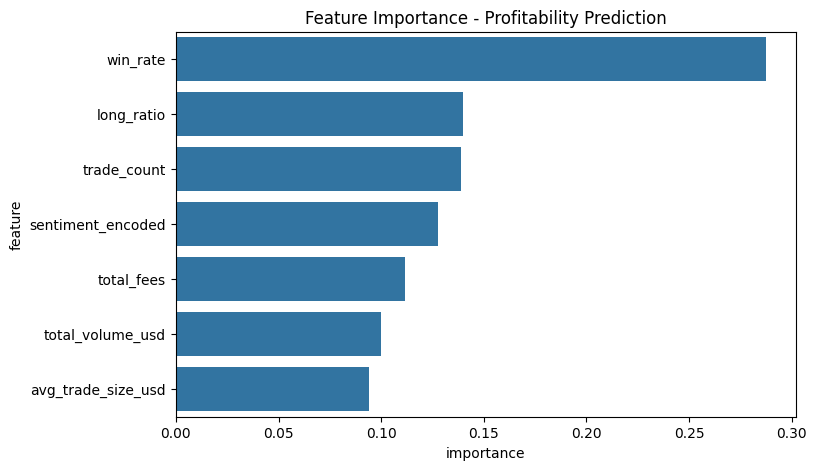

,feature,importance
3,win_rate,0.287651
4,long_ratio,0.139995
0,trade_count,0.138652
6,sentiment_encoded,0.127683
5,total_fees,0.111732
1,total_volume_usd,0.100109
2,avg_trade_size_usd,0.094178


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

feature_importance = pd.DataFrame({
    'feature': features,
    'importance': model.feature_importances_
}).sort_values(by='importance', ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(data=feature_importance, x='importance', y='feature')
plt.title("Feature Importance - Profitability Prediction")
plt.savefig('/content/drive/MyDrive/outputs/ml_feature_importance.png')
plt.show()

feature_importance